In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import gc
gc.enable()
import warnings
warnings.filterwarnings("ignore")
import time
import matplotlib
from tqdm import tqdm_notebook as tqdm

# IPAexゴシック以外のフォントを使って日本語化設定を行った場合は、適宜ここのフォント名を変更してください
font = {'family': 'IPAexGothic'}
matplotlib.rc('font', **font)

# EDAパート

In [2]:
# まずはデータロード
train = pd.read_csv("train.csv")
print(f"Trainデータのサイズ:{train.shape}")
train.sample(1)

Trainデータのサイズ:(31470, 17)


,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
9146,9147,115000,東京都墨田区菊川３丁目1-3,都営新宿線\t菊川(東京都)駅\t徒歩2分\t\t都営大江戸線\t森下(東京都)駅\t徒歩1...,1R,6年5ヶ月,西,25.35m2,8階／11階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐車場\t空有\t36,720円(税込)\t駐輪場\t空有\tバイク置き場\t空有",【スーパー】 140m\t【スーパー】 393m\t【コンビニ】 182m\t【コンビニ】 ...,RC（鉄筋コンクリート）,NaN


In [3]:
test = pd.read_csv("test.csv")
print(f"Testデータのサイズ:{test.shape}")
test.sample(1)

Testデータのサイズ:(31262, 16)


,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
25295,56766,東京都世田谷区弦巻１丁目,東急世田谷線\t世田谷駅\t徒歩12分\t\t東急世田谷線\t松陰神社前駅\t徒歩15分\t...,1LDK,6年0ヶ月,南,52.1m2,2階／2階建,専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立,コンロ設置可（口数不明）／\tシステムキッチン,BSアンテナ,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場,NaN,NaN,軽量鉄骨,NaN


In [4]:
sub = pd.read_csv("sample_submit.csv",header=None)
sub.head(1)

,0,1
0,31471,303875


In [5]:
# 欠損状況の確認
print("Trainデータの欠損数(カラム別)\n------------------------------")
print(train.isnull().sum(axis=0))
print("\n")
print("Testデータの欠損数(カラム別)\n------------------------------")
print(test.isnull().sum(axis=0))

Trainデータの欠損数(カラム別)
------------------------------
id           0
賃料           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2749
面積           0
所在階          0
バス・トイレ     329
キッチン       621
放送・通信     3440
室内設備        82
駐車場       5287
周辺環境      9432
建物構造         0
契約期間      7120
dtype: int64


Testデータの欠損数(カラム別)
------------------------------
id           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2808
面積           0
所在階          1
バス・トイレ     320
キッチン       635
放送・通信     3454
室内設備        73
駐車場       5356
周辺環境      9241
建物構造         0
契約期間      6981
dtype: int64


賃料の最大値:2500000,最小値:25000,平均:118290.30641881157,中央値:102000.0


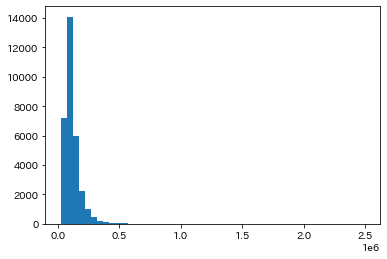

In [6]:
# 賃料の分布
a = plt.hist(train['賃料'],bins=50)
print(f"賃料の最大値:{train['賃料'].max()},最小値:{train['賃料'].min()},平均:{train['賃料'].mean()},中央値:{train['賃料'].median()}")

In [7]:
# 賃料250万の物件ってどんなの？？
train[train['賃料']==2500000]

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


In [8]:
# 値のパターンが限られそうなカラムについて、どんな値があるのか確認
train_and_test = pd.concat([train,test],axis=0)
for col in ['間取り','築年数','方角','面積','所在階','建物構造','契約期間']:
    print(col)
    print("-------------------------------------")
    print(train_and_test[col].value_counts())
    print("-------------------------------------\n")

間取り
-------------------------------------
1K            23661
1R            10177
1LDK           9702
2LDK           5131
1DK            3782
2DK            3715
3LDK           2240
2K             1807
3DK             851
1LDK+S(納戸)      487
2LDK+S(納戸)      326
4LDK            250
3LDK+S(納戸)      133
1K+S(納戸)        130
3K              102
5LDK             38
2DK+S(納戸)        38
4DK              33
1DK+S(納戸)        27
4LDK+S(納戸)       24
4K               12
3DK+S(納戸)        10
6LDK              9
5LDK+S(納戸)        9
5DK               8
5K                7
6LDK+S(納戸)        4
2K+S(納戸)          3
5DK+S(納戸)         3
4DK+S(納戸)         2
1LK+S(納戸)         2
3K+S(納戸)          2
6DK               2
1LK               1
2R                1
6K                1
8LDK              1
11R               1
Name: 間取り, dtype: int64
-------------------------------------

築年数
-------------------------------------
0年1ヶ月      1885
新築         1739
0年0ヶ月      1375
0年2ヶ月      1273
0年3ヶ月       997
           ..

In [9]:
# 怪しい値について調査

# 11Rなんて間取り本当にあるのか？
display(train_and_test[train_and_test['間取り']=="11R"])
# 多分1Rの間違い

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
8483,39954,NaN,東京都世田谷区桜上水５丁目,京王線\t桜上水駅\t徒歩5分\t\t京王線\t上北沢駅\t徒歩10分\t\t東急世田谷線\...,11R,64年0ヶ月,南,16m2,1階／2階建,専用バス／\t専用トイレ／\tシャワー,ガスコンロ／\t冷蔵庫あり,NaN,エアコン付\tバルコニー／\t室外洗濯機置場\t公営水道／\t下水／\t都市ガス,駐車場\t無,【大学】 544m\t【大学】 2238m\t【スーパー】 501m\t【スーパー】 699...,木造,2年間


## わかること & 大まかな方針
* 多くのカラムがタブ区切りの文字列情報になっており、そのまま特徴量として使うことができない  
  ⇒ 前処理で複数のカラムに分割した上で、学習時には文字列をカテゴリ変数や、数値情報にエンコードする
* 欠損値が多数存在するカラムが複数ある  
  ⇒ XGBoostやCatboostを使う場合は欠損補完が必須。lightgbmの場合は(動作条件としては)不要だが、うまく補完すると精度が上がることもあるのでよく考える
* 表記揺れや入力ミスらしいものもある  
  ⇒ クリーニングしたら精度は良くなるはず

# 前処理パート

In [10]:
# まとめて前処理するためtrainとtestを結合
train_and_test = pd.concat([train,test],axis=0)
train_and_test.sample(1)

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
7835,7836,55000.0,東京都江戸川区西葛西５丁目5-12,東西線\t西葛西駅\t徒歩2分\t\t東西線\t葛西駅\t徒歩17分\t\t都営新宿線\t船...,1R,32年7ヶ月,西,18.31m2,3階／6階建,専用バス／\t専用トイレ／\tシャワー,電気コンロ／\tコンロ1口／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t21,600円(税込)\t距離300m\tバイク置き場\t無",【スーパー】 241m\t【スーパー】 369m\t【コンビニ】 179m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間


## 1. 所在地の前処理
* データに含まれる物件は全て東京23区のものなので、所在地の「東京都」という情報は無意味。また町丁目(区より細かい住所)情報は特徴量としてsparseになると考えられるので、区情報のみを特徴量として使うことにする
* モデルに入力するために区情報を数値に変換する。ここではlabel encodingという手法を使う
    * 参考: https://qiita.com/QUANON/items/08a65012366abd150172
* 欠損は無いので、考慮不要

In [11]:
# 区情報の抽出
location = train_and_test['所在地'].str.replace("東京都","").str.split("区",expand=True)
location.columns = ["区","詳細住所"]
display(location.sample(1))
# 元のデータと結合し、不要になった所在地と詳細住所を削除
train_and_test = pd.concat([train_and_test,location],axis=1).drop(["所在地","詳細住所"],axis=1)

# 区情報の数値化(label encoding)
labels, uniques = pd.factorize(train_and_test['区'])
train_and_test['区'] = labels

train_and_test.sample(1)

,区,詳細住所
2673,中央,日本橋浜町２丁目


,id,賃料,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間,区
10395,41866,NaN,西武新宿線\t都立家政駅\t徒歩4分\t\t総武線・中央線（各停）\t高円寺駅\t徒歩20分...,1K,19年2ヶ月,南,23.82m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー,ガスコンロ／\tコンロ1口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 512m\t【スーパー】 652m\t【スーパー】 794m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間,15


## 2. 間取りの前処理
* 部屋数は数値情報として扱って良さそう(部屋が多ければ多いほど高いはず)
* K, L, D, S(納戸)の扱いはただの1部屋とする、普通の部屋とは別の部屋とするの2通りが考えられるが、今回は後者にする
* 入力ミス(11R)を見つけているので、1Rに直しておく
* 欠損は無いので、考慮不要

In [12]:
np.array(sorted(set(train_and_test['間取り'].value_counts().index)))

array(['11R', '1DK', '1DK+S(納戸)', '1K', '1K+S(納戸)', '1LDK', '1LDK+S(納戸)',
       '1LK', '1LK+S(納戸)', '1R', '2DK', '2DK+S(納戸)', '2K', '2K+S(納戸)',
       '2LDK', '2LDK+S(納戸)', '2R', '3DK', '3DK+S(納戸)', '3K', '3K+S(納戸)',
       '3LDK', '3LDK+S(納戸)', '4DK', '4DK+S(納戸)', '4K', '4LDK',
       '4LDK+S(納戸)', '5DK', '5DK+S(納戸)', '5K', '5LDK', '5LDK+S(納戸)',
       '6DK', '6K', '6LDK', '6LDK+S(納戸)', '8LDK'], dtype='<U10')

In [13]:
# 間取りのクリーニングとencoding
train_and_test['間取り'] = train_and_test['間取り'].replace("11R","1R")

# ↑で確認した限り、必ず1文字目が部屋数なので1文字目を取得
train_and_test['部屋数'] = train_and_test['間取り'].map(lambda x:int(x[0]))

# K, D, L, Sのあるなしを取得
train_and_test['K有無'] = train_and_test['間取り'].str.contains("K").astype(int)
train_and_test['D有無'] = train_and_test['間取り'].str.contains("D").astype(int)
train_and_test['L有無'] = train_and_test['間取り'].str.contains("L").astype(int)
train_and_test['S有無'] = train_and_test['間取り'].str.contains("S").astype(int)
del train_and_test["間取り"]

train_and_test.sample(1)

,id,賃料,アクセス,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,...,駐車場,周辺環境,建物構造,契約期間,区,部屋数,K有無,D有無,L有無,S有無
10423,10424,157000.0,都営大江戸線\t若松河田駅\t徒歩4分\t\t都営大江戸線\t牛込柳町駅\t徒歩6分\t\t...,0年1ヶ月,東,36.62m2,5階／10階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tインターネット使用料無料,...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 205m\t【スーパー】 325m\t【コンビニ】 443m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間,14,2,1,0,0,0


## 3. 築年数の前処理
* 基本的には、1ヶ月=1/12年として年単位の数値として扱えば良さそう
* 例外的な入力として「新築」があるが、これは0に変換
* 入力ミスもあるかもしれないが、このコードでは確認しない
* 欠損は無いので、考慮不要

In [14]:
# 築年数の数値化

# 正規表現で年と月を抽出
year_month = train_and_test['築年数'].str.replace("新築","0年0ヶ月").str.extract('(?P<year>.+)年(?P<month>.+)ヶ月')
# 1ヶ月を1/12年として合算
year_month['築年数'] = year_month['year'].astype(np.int8)+year_month['month'].astype(np.int8)/12.0

train_and_test = pd.concat([train_and_test.drop('築年数',axis=1),year_month['築年数']],axis=1)
train_and_test.sample(1)

,id,賃料,アクセス,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,...,周辺環境,建物構造,契約期間,区,部屋数,K有無,D有無,L有無,S有無,築年数
10713,10714,60000.0,京成本線\t新三河島駅\t徒歩3分\t\t山手線\t西日暮里駅\t徒歩8分\t\t常磐線快速...,南,12m2,4階／5階建,専用トイレ,ガスコンロ／\tコンロ2口／\t給湯,NaN,エアコン付\t公営水道／\t下水／\t都市ガス,...,NaN,RC（鉄筋コンクリート）,2年間,5,1,0,0,0,0,49.0


## 4. 面積の前処理
* 「m2」を除外して数値として扱えば良さそう
* 入力ミス、表記揺れが無いかは予め確認しておく
* 欠損は無いので、考慮不要

In [15]:
# 面積に「m2」を含まないレコードが無いか？
train_and_test[~train_and_test['面積'].str.contains('m2')]

,id,賃料,アクセス,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,...,周辺環境,建物構造,契約期間,区,部屋数,K有無,D有無,L有無,S有無,築年数


In [16]:
# 無いようなので、一律変換する(数値型にするのを忘れずに)
train_and_test['面積'] = (train_and_test['面積'].str.split("m2",expand=True)[0]).astype(np.float32)
train_and_test.sample(1)

,id,賃料,アクセス,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,...,周辺環境,建物構造,契約期間,区,部屋数,K有無,D有無,L有無,S有無,築年数
11464,42935,NaN,都営大江戸線\t練馬春日町駅\t徒歩8分\t\t都営大江戸線\t光が丘駅\t徒歩12分,西,61.5,6階／7階建,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tカウンターキッチン\t／\t給湯,インターネット対応／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tウォークインクローゼット\tバルコニー／\tフローリング／\t室内洗濯機置場／...,...,NaN,RC（鉄筋コンクリート）,2年間,6,2,1,1,1,0,0.0


## 5. 所在階の前処理
* 基本的には、「X」階建、「Y」階の2つの情報だけ数値情報として抽出すれば良さそう
* 地下の扱いは悩ましいが、一旦は一律「-1」とする。「X」階建における地下の情報は無視する(例えば10階建地下なしと、10階建地下3階の扱いは同じになる)
* 入力ミス、表記揺れが無いかは予め確認しておく
* 欠損が1レコードだけあるので、「不明」で穴埋めしておく

In [17]:
# np.arrayの要素数がいくつまでだったら省略せずに表示するか
np.set_printoptions(threshold=10000)
np.array(sorted(set(train_and_test['所在階'].value_counts().index)))

array(['10階／10階建', '10階／10階建（地下1階）', '10階／10階建（地下2階）', '10階／11階建',
       '10階／11階建（地下1階）', '10階／12階建', '10階／12階建（地下1階）', '10階／13階建',
       '10階／13階建（地下1階）', '10階／13階建（地下2階）', '10階／14階建', '10階／14階建（地下1階）',
       '10階／14階建（地下2階）', '10階／15階建', '10階／15階建（地下1階）', '10階／16階建',
       '10階／16階建（地下2階）', '10階／17階建', '10階／18階建', '10階／19階建',
       '10階／19階建（地下2階）', '10階／20階建', '10階／20階建（地下2階）', '10階／21階建',
       '10階／21階建（地下2階）', '10階／22階建', '10階／22階建（地下1階）', '10階／22階建（地下2階）',
       '10階／23階建', '10階／24階建', '10階／24階建（地下1階）', '10階／25階建（地下2階）',
       '10階／26階建', '10階／26階建（地下1階）', '10階／27階建', '10階／27階建（地下1階）',
       '10階／30階建', '10階／30階建（地下3階）', '10階／32階建', '10階／32階建（地下2階）',
       '10階／33階建', '10階／33階建（地下1階）', '10階／37階建', '10階／38階建', '10階／39階建',
       '10階／39階建（地下1階）', '10階／42階建', '10階／44階建（地下2階）', '10階／47階建',
       '10階／47階建（地下2階）', '10階／48階建', '10階／8階建', '11階／11階建',
       '11階／11階建（地下1階）', '11階／12階建', '11階／12階建（地下1階）', '11階／12階建（地下2階）',
       '11階／13階建', '11階／13階建（地下1階）', '11階／13階建（地下2階

「X」階と「Y」階建、どちらかの情報が欠損している場合がある。この場合は一旦NaNとして扱う

In [18]:
# NaN埋めし、「地下」を「-」に変換
train_and_test['所在階'] = train_and_test['所在階'].fillna("不明").str.replace("地下","-")

# まずは「X」階／「Y」階建の表記になっているレコードを変換
train_and_test_match = train_and_test[train_and_test['所在階'].str.match("[\-0-9]+階／[\-0-9]+階建")].copy()
floors_match = train_and_test_match['所在階'].str.extract('(?P<floor>[\-0-9]+)階／(?P<all_floor>[\-0-9]+)階建')
train_and_test_match = pd.concat([train_and_test_match,floors_match],axis=1)

# 上の表記になっていない(すなわち、どちらかの情報が欠損している)レコードを抽出
train_and_test_unmatch = train_and_test[~train_and_test['所在階'].str.match("[\-0-9]+階／[\-0-9]+階建")].copy()

# 「Y」階建だけの表記になっているレコードを変換
train_and_test_unmatch_0 = train_and_test_unmatch[train_and_test_unmatch['所在階'].str.contains('階建')].copy()
floors_unmatch_0 = train_and_test_unmatch_0['所在階'].str.extract('(?P<all_floor>[\-0-9]+)階建')
train_and_test_unmatch_0 = pd.concat([train_and_test_unmatch_0,floors_unmatch_0],axis=1)

# 「X」階だけの表記になっているレコードを変換
train_and_test_unmatch_1 = train_and_test_unmatch[~train_and_test_unmatch['所在階'].str.contains('階建')].copy()
floors_unmatch_1 = train_and_test_unmatch_1['所在階'].str.extract('(?P<floor>[\-0-9]+)階')
train_and_test_unmatch_1 = pd.concat([train_and_test_unmatch_1,floors_unmatch_1],axis=1)

train_and_test = pd.concat([train_and_test_match,train_and_test_unmatch_0,train_and_test_unmatch_1],axis=0)
# 「X」階、「Y」階建どちらの情報もNaNになっているレコードは1つしかないはず。
# 2つ以上あると変換ミスが起きていることになるので、1つしかないことを確認
print(len(train_and_test[(train_and_test["floor"].isnull())&(train_and_test["all_floor"].isnull())]))

del train_and_test['所在階']

# 数値型に変換する。NaNが入っていると変換できないので、一度適当な値で埋めて変換する
train_and_test['floor'] = train_and_test['floor'].fillna(99999)
train_and_test['all_floor'] = train_and_test['all_floor'].fillna(99999)
train_and_test = train_and_test.astype({'floor':"int16",'all_floor':"int16"})
#「X」階 = floor の値が負になっているレコードを一律-1に設定
train_and_test.loc[train_and_test['floor']<0,'floor'] = -1
# 99999をNaNに戻す
train_and_test['floor'] = train_and_test['floor'].replace(99999,np.nan)
train_and_test['all_floor'] = train_and_test['all_floor'].replace(99999,np.nan)

train_and_test.sample(1)

1


,id,賃料,アクセス,方角,面積,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,...,契約期間,区,部屋数,K有無,D有無,L有無,S有無,築年数,floor,all_floor
8737,8738,70000.0,丸ノ内線(池袋－荻窪)\t新中野駅\t徒歩1分\t\t中央線（快速）\t中野(東京都)駅\t...,東,23.540001,専用バス／\t専用トイレ／\tシャワー,IHコンロ\t／\tコンロ1口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,...,2年間,15,1,1,0,0,0,36.166667,3,8


## 6. 建物構造の前処理
* label encodingで数値化し、カテゴリ変数として扱えば良さそう
* 入力ミス、表記揺れが無いかは予め確認しておく
* 欠損は無いので、考慮不要

In [19]:
np.array(sorted(set(train_and_test['建物構造'].value_counts().index)))

array(['ALC（軽量気泡コンクリート）', 'HPC（プレキャスト・コンクリート（重量鉄骨））',
       'PC（プレキャスト・コンクリート（鉄筋コンクリート））', 'RC（鉄筋コンクリート）', 'SRC（鉄骨鉄筋コンクリート）',
       'その他', 'ブロック', '木造', '軽量鉄骨', '鉄筋ブロック', '鉄骨造'], dtype='<U27')

In [20]:
# label encoding
labels, uniques = pd.factorize(train_and_test['建物構造'])
train_and_test['建物構造'] = labels
train_and_test.sample(1)

,id,賃料,アクセス,方角,面積,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,...,契約期間,区,部屋数,K有無,D有無,L有無,S有無,築年数,floor,all_floor
10638,42109,NaN,丸ノ内線(池袋－荻窪)\t新宿御苑前駅\t徒歩3分\t\t丸ノ内線(池袋－荻窪)\t新宿三丁...,NaN,21.0,専用バス／\t専用トイレ,IHコンロ\t／\tシステムキッチン,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t敷地内ごみ置き場\t／...,駐輪場\t空有,...,2年間,14,1,0,0,0,0,33.916667,7,11


## 7. 契約期間の前処理
* 基本的には「X」年「Yヶ月」間の部分を数値化すれば良さそう
* 「定期借家」という表記が多数ある。定期借家かそうでないかは家賃設定上重要そうなので、フラグを特徴量として持たせる
    * 参考: https://www.ur-net.go.jp/chintai/college/201909/000399.html
* 「X」年「Y」ヶ月表記ではなく、「A年B月まで」という表記が多くある。コンペページの「データ」タブにある説明を読むと契約起点は2019年8月らしいので、差分を計算すれば同じ基準で扱える
    * https://signate.jp/competitions/264/data
* 欠損が多数あるが、このコードでは穴埋めはしない

In [21]:
np.array(sorted(set(train_and_test['契約期間'].value_counts().index)))

array(['10ヶ月間\t※この物件は\t定期借家\tです。', '10年間\t※この物件は\t定期借家\tです。', '12年間',
       '15年間', '1ヶ月間', '1ヶ月間\t※この物件は\t定期借家\tです。',
       '1年10ヶ月間\t※この物件は\t定期借家\tです。', '1年5ヶ月間\t※この物件は\t定期借家\tです。',
       '1年6ヶ月間\t※この物件は\t定期借家\tです。', '1年8ヶ月間', '1年8ヶ月間\t※この物件は\t定期借家\tです。',
       '1年間', '1年間\t※この物件は\t定期借家\tです。', '2019年11月まで\t※この物件は\t定期借家\tです。',
       '2019年12月まで\t※この物件は\t定期借家\tです。', '2020年11月まで\t※この物件は\t定期借家\tです。',
       '2020年12月まで\t※この物件は\t定期借家\tです。', '2020年1月まで\t※この物件は\t定期借家\tです。',
       '2020年2月まで\t※この物件は\t定期借家\tです。', '2020年3月まで\t※この物件は\t定期借家\tです。',
       '2020年5月まで\t※この物件は\t定期借家\tです。', '2020年6月まで\t※この物件は\t定期借家\tです。',
       '2020年7月まで', '2020年8月まで\t※この物件は\t定期借家\tです。',
       '2021年12月まで\t※この物件は\t定期借家\tです。', '2021年1月まで\t※この物件は\t定期借家\tです。',
       '2021年2月まで\t※この物件は\t定期借家\tです。', '2021年3月まで\t※この物件は\t定期借家\tです。',
       '2021年4月まで\t※この物件は\t定期借家\tです。', '2021年5月まで\t※この物件は\t定期借家\tです。',
       '2021年6月まで\t※この物件は\t定期借家\tです。', '2021年7月まで\t※この物件は\t定期借家\tです。',
       '2021年8月まで\t※この物件は\t定期借家\tです。', '20

In [22]:
# NaNがあると動かない処理が多くあるので、最初にNaNを適当な値で埋める
train_and_test['契約期間'] = train_and_test['契約期間'].fillna("不明")

# 定期借家か否かのフラグ (True/Falseで出てくるので1/0に変換)
train_and_test['定期借家フラグ'] = train_and_test['契約期間'].str.contains("定期借家").map({False:0,True:1})

# まずは「X」年「Yヶ月」間 表記になっているレコードのX, Yを抽出
train_and_test_keiyaku1 = train_and_test[train_and_test['契約期間'].str.match("[0-9]+年[0-9+]ヶ月間")].copy()
keiyaku_year_month = train_and_test_keiyaku1['契約期間'].str.extract('(?P<契約_year>[0-9]+)年(?P<契約_month>[0-9]+)ヶ月間')
keiyaku_year_month = keiyaku_year_month.astype({'契約_year':"int8",'契約_month':"int8"})
# 月を年に換算して合算
keiyaku_year_month['keiyaku_length'] = keiyaku_year_month['契約_year']+(keiyaku_year_month['契約_month']/12.0)
# 元のデータフレームのidと結合(idはマージ用)
train_and_test_keiyaku1 = pd.concat([train_and_test_keiyaku1[['id']],keiyaku_year_month[['keiyaku_length']]],axis=1)

# 「X」年「Yヶ月」間 表記になっておらず、かつ「A年B月まで」表記にもなっていないレコードを抽出
train_and_test_keiyaku2 = train_and_test[(~train_and_test['契約期間'].str.match("[0-9]+年[0-9+]ヶ月間"))&(~train_and_test['契約期間'].str.contains("まで"))].copy()

# 「X」年間 表記になっているレコードを変換
train_and_test_keiyaku2_year = train_and_test_keiyaku2[train_and_test_keiyaku2['契約期間'].str.match("[0-9]+年間")].copy()
keiyaku_year = train_and_test_keiyaku2_year['契約期間'].str.extract('(?P<keiyaku_length>[0-9]+)年間')
keiyaku_year = keiyaku_year.astype({'keiyaku_length':"int8"})
train_and_test_keiyaku2_year = pd.concat([train_and_test_keiyaku2_year[['id']],keiyaku_year],axis=1)
# 「Y」ヶ月間 表記になっているレコードを変換
train_and_test_keiyaku2_month = train_and_test_keiyaku2[train_and_test_keiyaku2['契約期間'].str.match("[0-9]+ヶ月間")].copy()
keiyaku_month = train_and_test_keiyaku2_month['契約期間'].str.extract('(?P<keiyaku_length>[0-9]+)ヶ月間')
keiyaku_month = keiyaku_month.astype({'keiyaku_length':"float32"})
# 月を年に換算
keiyaku_month['keiyaku_length'] /= 12.0
train_and_test_keiyaku2_month = pd.concat([train_and_test_keiyaku2_month[['id']],keiyaku_month],axis=1)

# 「A年B月まで」表記にもなっているレコードを抽出 & 変換
train_and_test_keiyaku3 = train_and_test[train_and_test['契約期間'].str.contains("まで")].copy()
keiyaku_until = train_and_test_keiyaku3['契約期間'].str.extract('(?P<年>[0-9]+)年(?P<月>[0-9]+)月まで')
keiyaku_until = keiyaku_until.astype({'年':"int16",'月':"int8"})
# 2019年8月を起点に引き算した後に年換算
keiyaku_until['keiyaku_length'] = ((keiyaku_until['年']-2019)*12+(keiyaku_until['月']-8))/12.0
train_and_test_keiyaku3 = pd.concat([train_and_test_keiyaku3[['id']],keiyaku_until[['keiyaku_length']]],axis=1)

# 加工したデータフレームを結合
train_and_test_keiyaku = pd.concat([train_and_test_keiyaku1,train_and_test_keiyaku2_year,train_and_test_keiyaku2_month,train_and_test_keiyaku3],axis=0)
# 元のデータフレームにマージ
train_and_test = train_and_test.merge(train_and_test_keiyaku,on='id',how="left")
del train_and_test['契約期間']

train_and_test.sample(1)

,id,賃料,アクセス,方角,面積,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,...,部屋数,K有無,D有無,L有無,S有無,築年数,floor,all_floor,定期借家フラグ,keiyaku_length
37805,38673,NaN,京急本線\t平和島駅\t徒歩3分\t\t京急本線\t大森海岸駅\t徒歩12分\t\t京浜東北...,南,17.799999,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機,ガスコンロ／\tコンロ1口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tフローリング／\t2面採光／\t室内洗濯機置場／\t敷地...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,...,1,0,0,0,0,0.0,2,3,0,2.0


## 8. アクセスの前処理
* 様々な情報が格納されているが、ここでは「最初に書かれている」駅からの移動手段と所要時間のみを抽出する
* 欠損は無いので、考慮不要

In [23]:
train_and_test.sample(10)['アクセス'].values

array(['都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t西武新宿線\t沼袋駅\t徒歩15分',
       '埼京線\t板橋駅\t徒歩3分\t\t都営三田線\t新板橋駅\t徒歩9分\t\t東武東上線\t下板橋駅\t徒歩10分',
       '常磐線\t亀有駅\t徒歩7分\t\t千代田線\t北綾瀬駅\t徒歩20分',
       '京浜東北線\t大森(東京都)駅\t徒歩12分\t\t都営浅草線\t馬込駅\t徒歩15分\t\t都営浅草線\t西馬込駅\t徒歩19分',
       '丸ノ内線(池袋－荻窪)\t池袋駅\t徒歩8分\t\t山手線\t池袋駅\t徒歩11分\t\t有楽町線\t池袋駅\t徒歩8分',
       '都営新宿線\t瑞江駅\t徒歩8分\t\t都営新宿線\t篠崎駅\t徒歩18分\t\t都営新宿線\t一之江駅\t徒歩28分',
       '都営浅草線\t馬込駅\t徒歩4分\t\t東急大井町線\t荏原町駅\t徒歩11分\t\t東急池上線\t長原(東京都)駅\t徒歩16分',
       '京浜東北線\t赤羽駅\t徒歩12分\t\t南北線\t志茂駅\t徒歩4分\t\t南北線\t赤羽岩淵駅\t徒歩18分',
       '東武東上線\t東武練馬駅\t徒歩9分\t\t東武東上線\t下赤塚駅\t徒歩10分\t\t有楽町線\t地下鉄赤塚駅\t徒歩9分',
       '都営大江戸線\t麻布十番駅\t徒歩9分\t\t日比谷線\t広尾駅\t徒歩12分\t\t都営三田線\t白金高輪駅\t徒歩17分'],
      dtype=object)

In [24]:
train_and_test['アクセス'].str.split("\t",expand=True).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,都営三田線,西巣鴨駅,徒歩4分,,埼京線,板橋駅,徒歩14分,,都電荒川線,西ケ原四丁目駅,徒歩7分,None,None
1,都営大江戸線,勝どき駅,徒歩5分,,有楽町線,月島駅,徒歩9分,,日比谷線,築地駅,徒歩20分,None,None
2,京王線,笹塚駅,徒歩6分,,京王線,代田橋駅,徒歩7分,,京王線,明大前駅,徒歩17分,None,None


バスの場合は/が入る別表記になるようなので、専用の前処理方法が必要

In [25]:
# ちゃんとタブ区切りで抽出できているか確認 nullが一つもないならOK
print(train_and_test['アクセス'].str.split("\t",expand=True)[2].isnull().sum())
# mot(mean_of_transportation) and time
mot_time = train_and_test['アクセス'].str.split("\t",expand=True)[2]
# 後で元データと紐づけるためにidだけ追加しておく
mot_time = pd.concat([train_and_test[['id']],mot_time],axis=1)
mot_time.columns = ['id','mot']
mot_time.sample(1)

0


,id,mot
27250,27877,徒歩8分


In [26]:
# バス関連情報の抽出方法を検討するため「バス」が入っているレコードだけ切り出す
mot_bus = mot_time[mot_time['mot'].str.contains('バス')]
print(mot_bus['mot'][:5])
display(mot_bus['mot'].str.extract('バス\((?P<バス_time>[0-9]+)分\).+徒歩(?P<徒歩_time>[0-9]+)分')[:5])

# ↑の書き方でうまくいきそうなので、抽出
mot_bus_ext = mot_bus['mot'].str.extract('バス\((?P<バス_time>[0-9]+)分\).+徒歩(?P<徒歩_time>[0-9]+)分')
mot_bus = pd.concat([mot_bus,mot_bus_ext],axis=1)
# nullが無いか確認
display(mot_bus[mot_bus.isnull().any(1)])
# まだある。バス後の徒歩記述が無いためマッチしなかった模様
# バス関連の情報と徒歩関連の情報を独立して抽出することで対応

# 作成しなおし
mot_bus = mot_time[mot_time['mot'].str.contains('バス')]
mot_bus_ext1 = mot_bus['mot'].str.extract('バス\((?P<バス_time>[0-9]+)分\)')
mot_bus_ext2 = mot_bus['mot'].str.extract('徒歩(?P<徒歩_time>[0-9]+)分')
# 徒歩情報が無いものについては徒歩0分として扱う
mot_bus = pd.concat([mot_bus,mot_bus_ext1,mot_bus_ext2],axis=1).fillna(0)
# nullが無いか確認
display(mot_bus[mot_bus.isnull().any(1)])
# OK!
# 元の情報は要らないので削除
del mot_bus['mot']
# 数値型に変更
mot_bus = mot_bus.astype({'バス_time':"float16",'徒歩_time':"float16"})

mot_bus.sample(1)

124           /バス(6分)都民農園下車徒歩1分
232           /バス(19分)長久保下車徒歩2分
431         /バス(7分)大泉風致地区下車徒歩5分
596        /バス(10分)関町郵便局前下車徒歩1分
667    /バス(16分)新小71　農業試験場下車徒歩3分
Name: mot, dtype: object


,バス_time,徒歩_time
124,6,1
232,19,2
431,7,5
596,10,1
667,16,3


,id,mot,バス_time,徒歩_time
1340,1373,/バス(15分)ふれあいの家下車,NaN,NaN
13196,13508,/バス(15分)西水元２丁目下車,NaN,NaN
30573,31283,/バス(9分)ふれあいの家下車,NaN,NaN
37919,38791,/バス(8分)水元公園下車,NaN,NaN
45883,46966,/バス(10分)バス下車,NaN,NaN
55576,56907,/バス(8分)水元公園下車,NaN,NaN
55690,57024,/バス(8分)水元4丁目下車,NaN,NaN
61942,30996,/バス(7分)水元4丁目下車,NaN,NaN


,id,mot,バス_time,徒歩_time


,id,バス_time,徒歩_time
62565,57670,12.0,5.0


In [27]:
# バスが含まれないレコードに関しては、徒歩「X」分だけ切り出せばよいはず
mot_walk = mot_time[~mot_time['mot'].str.contains('バス')]
mot_walk_ext = mot_walk['mot'].str.extract('徒歩(?P<徒歩_time>[0-9]+)分')
mot_walk = pd.concat([mot_walk,mot_walk_ext],axis=1)
# nullが無いか確認
display(mot_walk[mot_walk.isnull().any(1)])
# まさかの車レコードがあった。。扱いが悩ましいが、単純に考えると「車しか選択肢がない」ということなので
# 徒歩換算で計算して不利な立地であることを表現する

# やりなおし
mot_car = mot_time[(~mot_time['mot'].str.contains('バス'))&(mot_time['mot'].str.contains('車'))]
mot_walk = mot_time[(~mot_time['mot'].str.contains('バス'))&(~mot_time['mot'].str.contains('車'))]
mot_car_ext = mot_car['mot'].str.extract('車(?P<徒歩_time>[0-9\.]+)km\(')
# 徒歩は約時速4kmなので、4で割って60をかける
mot_car_ext['徒歩_time'] = mot_car_ext['徒歩_time'].astype(np.float16)*60.0/4.0
mot_walk_ext = mot_walk['mot'].str.extract('徒歩(?P<徒歩_time>[0-9]+)分')
mot_car = pd.concat([mot_car,mot_car_ext],axis=1)
mot_walk = pd.concat([mot_walk,mot_walk_ext],axis=1)
display(mot_car[mot_car.isnull().any(1)])
display(mot_walk[mot_walk.isnull().any(1)])
# OK!
# 元の情報は要らないので削除
del mot_car['mot'],mot_walk['mot']
# 数値型に変更
mot_car = mot_car.astype({'徒歩_time':"float16"})
mot_walk = mot_walk.astype({'徒歩_time':"float16"})
mot_walk.sample(1)

,id,mot,徒歩_time
12290,12582,車3km(15分),NaN
33458,34225,車3.1km(10分),NaN
62077,37604,車3.9km(11分),NaN


,id,mot,徒歩_time


,id,mot,徒歩_time


,id,徒歩_time
39142,40045,8.0


In [28]:
# motデータフレームをconcat
# バス関連の情報が無いレコードのバス_timeは0で埋める
mot_all = pd.concat([mot_bus,mot_car,mot_walk],axis=0).fillna(0)

# 元データフレームと結合
train_and_test = train_and_test.merge(mot_all,on='id',how="left")
# アクセス情報は削除
del train_and_test['アクセス']

train_and_test.sample(1)

,id,賃料,方角,面積,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,...,D有無,L有無,S有無,築年数,floor,all_floor,定期借家フラグ,keiyaku_length,バス_time,徒歩_time
44032,45079,NaN,南,22.33,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯／\t冷蔵庫あり／\t独立キッチン,インターネット対応／\tインターネット使用料無料,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐車場\t近隣\t30,000円(税込)\t距離500m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 275m\t【スーパー】 970m\t【コンビニ】 538m\t【コンビニ】 ...,...,0,0,0,10.416667,5,8,1,2.0,0.0,9.0


## 9. 方角の前処理
* label encodingで数値化し、カテゴリ変数として扱えば良さそう
* 入力ミス、表記揺れが無いかは予め確認しておく
* 欠損があるが、一旦何もしないでおく

In [29]:
np.array(set(train_and_test['方角'].values))

array({nan, '南東', '北東', '北', '西', '東', '北西', '南', '南西'}, dtype=object)

In [30]:
# label encoding
# NaNは自動的に-1になる
labels, uniques = pd.factorize(train_and_test['方角'])
train_and_test['方角'] = labels
train_and_test.sample(1)

,id,賃料,方角,面積,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,...,D有無,L有無,S有無,築年数,floor,all_floor,定期借家フラグ,keiyaku_length,バス_time,徒歩_time
27808,28452,74000.0,1,31.559999,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,ガスコンロ／\tコンロ2口／\t給湯,NaN,エアコン付\tバルコニー／\t2面採光／\tタイル張り\t公営水道／\t下水／\t都市ガス,"駐車場\t近隣\t19,000円(税込)\t距離400m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 261m\t【スーパー】 261m\t【スーパー】 423m\t【コンビニ】 ...,...,1,0,0,33.833333,4,4,0,NaN,0.0,4.0


## 10. その他情報の前処理
* バス・トイレやキッチンなどのカラムにも様々な情報が格納されているが、ベースラインコードではこれらの前処理は省略して全て削除する

In [31]:
drop_cols = ['バス・トイレ', 'キッチン', '放送・通信', '室内設備', '駐車場', '周辺環境']
train_and_test = train_and_test.drop(drop_cols,axis=1)

# 最後に、trainとtestに分ける
train = train_and_test[train_and_test['賃料'].notnull()].copy().reset_index(drop=True)
test = train_and_test[train_and_test['賃料'].isnull()].copy().reset_index(drop=True)
del train_and_test
gc.collect()

print(train.shape,test.shape)
train.sample(3)

(31470, 18) (31262, 18)


,id,賃料,方角,面積,建物構造,区,部屋数,K有無,D有無,L有無,S有無,築年数,floor,all_floor,定期借家フラグ,keiyaku_length,バス_time,徒歩_time
19377,19834,175000.0,-1,28.770000,0,2,1,0,0,0,0,1.000000,3,11,0,2.0,0.0,9.0
19886,20355,115000.0,1,24.400000,0,20,1,1,0,0,0,11.583333,4,13,0,2.0,0.0,2.0
15529,15894,140000.0,6,43.200001,0,5,1,1,1,1,0,11.666667,9,13,0,NaN,0.0,5.0


# 学習・予測パート

## バリデーションについて
* 今回のデータは時系列データではなく、trainとtestで地域が分かれているわけでもない。またクラス分類でもないのでStratifiedKFoldは使えない。よって通常のKFoldを使っても十分そう。fold数は適当に5にする
    * ただし、「KFoldが最適」とは限らない
    * Foldに関する詳しい話はこちら: https://upura.hatenablog.com/entry/2018/12/04/224436

## 評価指標について
* 評価指標はRMSEになっている。これは微分可能で、lightgbmのデフォルトloss functionにも同様のもの(MSE)が存在する。objective="regression"とすればよし

In [32]:
# 関連ライブラリのimport
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
#fold数
folds = 5

In [33]:
# lgbmのモデルを関数で定義しておく
def fit_lgb(X_fit, y_fit, X_val, y_val, counter, feats, cat_col_indices):
    
    lightgbm_params = {
     'objective': "regression",
     'metric':"rmse",
     'learning_rate': 0.03, # 学習率(デフォルトは0.03 or auto)
     'max_depth': -1, 
     'num_leaves': 127, # 枝分かれの数
     'min_child_samples': 10, # 1つの葉に入るべき最小データ数
     'colsample_bytree': 0.8, # baggingで使用する特徴量の割合 
     'subsample': 0.8, # baggingで使用するオブジェクトの割合
     'seed': 42, # random seed
     'n_estimators': 30000, # 学習回数
     'n_jobs': -1,
    }
    
    model = lgb.LGBMRegressor(**lightgbm_params)
     
    model.fit(X_fit, y_fit, 
              eval_set=[(X_val, y_val)],
              categorical_feature = cat_col_indices,
              verbose=1000, # 1000 iterationごとに詳細を表示
              early_stopping_rounds=500) # 500 iterationの間validation setの精度が向上しなかったら学習終了
    
    # validation setの予測結果を格納
    cv_pred = model.predict(X_val)
    
    # 特徴量重要度を後で確認するためデータフレームに格納
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = counter + 1
    
    return model, cv_pred, fold_importance_df

## 学習


Fold 1
[1000]	valid_0's rmse: 32222.5
[2000]	valid_0's rmse: 32099.5
[3000]	valid_0's rmse: 32064.5
[4000]	valid_0's rmse: 32050.4
[5000]	valid_0's rmse: 32048
[6000]	valid_0's rmse: 32046.6

Fold 2

Fold 3
[1000]	valid_0's rmse: 17838.5
[2000]	valid_0's rmse: 17607.4
[3000]	valid_0's rmse: 17506.4
[4000]	valid_0's rmse: 17449.3
[5000]	valid_0's rmse: 17420.7
[6000]	valid_0's rmse: 17402.9
[7000]	valid_0's rmse: 17396.7

Fold 4
[1000]	valid_0's rmse: 16895.7

Fold 5
Trainデータ全体のRMSE: 21048.41265


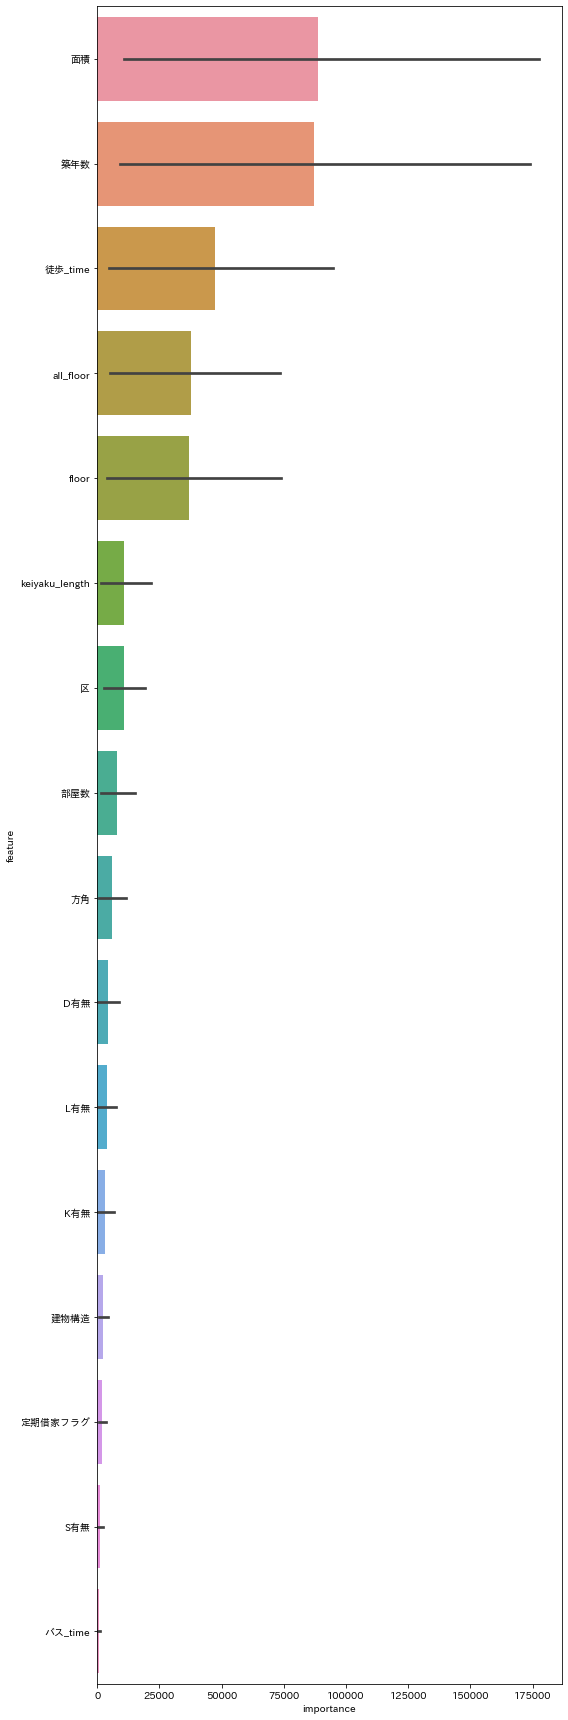

Elapsed time：688.54 sec


In [34]:
t0 = time.time()

# 目的変数
train_y = np.array(train['賃料'])
# idは特徴量には使えないので切り出しておく
train_ids = np.array(train['id'])

# idと賃料以外が特徴量になる
feats = [col for col in train.columns if col not in ['id','賃料']]

# カテゴリ変数のインデックス番号を取得
# lightgbmでは学習時にどの特徴量がカテゴリ変数なのか引数で指定できるが、
# 特徴量の名前ではなく特徴量の「インデックス番号」で指定する必要がある(バージョンによっても違うかも)
categorical_feats_name = ['方角','建物構造','区','定期借家フラグ']
categorical_feats_indices = []
for col in categorical_feats_name:
    categorical_feats_indices.append(list(train[feats].columns).index(col))

# KFoldで順々に学習⇒評価していくので、最終的にtrain set全体に対するRMSEを評価するため予測結果の格納場所を用意しておく
cv_preds = np.zeros(train.shape[0])

kf = KFold(n_splits=folds, shuffle=True, random_state=42)
# kf.get_n_splits(train_ids, train_y)

# 特徴量重要度格納用タプル
feature_importances = []
# モデル格納用タプル
models = []

for counter, ids in enumerate(kf.split(train_ids, train_y)):
    print('\nFold {}'.format(counter+1))
    # training set
    X_fit, y_fit = train[feats].values[ids[0]], train_y[ids[0]]
    # validation set
    X_val, y_val = train[feats].values[ids[1]], train_y[ids[1]]

    model, cv_pred, fold_importance_df = fit_lgb(X_fit, y_fit, X_val, y_val, counter, feats, categorical_feats_indices)
    # 該当するインデックスにvalidation setの予測結果を格納
    cv_preds[ids[1]] += cv_pred
    models.append(model)
    feature_importances.append(fold_importance_df)
    del X_fit, X_val, y_fit, y_val
    gc.collect()

# trainデータ全体のRMSEを評価
rmse = np.sqrt(mean_squared_error(cv_preds,train_y))
print('Trainデータ全体のRMSE: {:.5f}'.format(rmse))

# 特徴量重要度のプロット
feature_importance_df = pd.concat(feature_importances)
mean_importance = feature_importance_df[["feature", "importance"]].groupby('feature').mean()
feature_importance_df['mean_importance'] = feature_importance_df['feature'].map(mean_importance['importance'])
plt.figure(figsize=(8,24), facecolor='w')
#plt.rcParams["font.size"] = 16
sns.barplot(x='importance', y='feature', 
            data=feature_importance_df.sort_values('mean_importance', ascending=False).iloc[:5 * 50])
plt.tight_layout()
plt.show()

t1 = time.time()
elapsed_time = t1-t0
print("Elapsed time：{:.2f} sec".format(elapsed_time))

## 予測

In [35]:
t0 = time.time()
# submissionにidが必要なのでidは必ず確保しておく
test_ids = test["id"]

test_preds = np.zeros(test.shape[0])
# fold数分のモデルの予測結果を平均(アンサンブル)
for model in tqdm(models):
    test_preds += model.predict(test[feats].values)/folds

submission = pd.DataFrame({"id":test_ids,
                           "賃料":test_preds})

# submissionのフォーマットにのっとって出力
submission.to_csv("submission_lgbm.csv", sep=",", index=False, header=None)

t1 = time.time()
elapsed_time = t1-t0
print("Elapsed time：{:.2f} sec".format(elapsed_time))

  0%|          | 0/5 [00:00<?, ?it/s]

Elapsed time：4.10 sec


## 結果
CV: 21048  
LB(Public): 21026